In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
img_size=256
bth_size=32
ip_shape=(bth_size,img_size,img_size,3)
n_cls=3
EPOCHS=50

In [3]:
tf_data=tf.keras.preprocessing.image_dataset_from_directory('PlantVillage',image_size=(img_size,img_size),shuffle=True,batch_size=bth_size)

Found 16011 files belonging to 10 classes.


In [4]:
cls_name = tf_data.class_names
cls_name

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(tf_data)

501

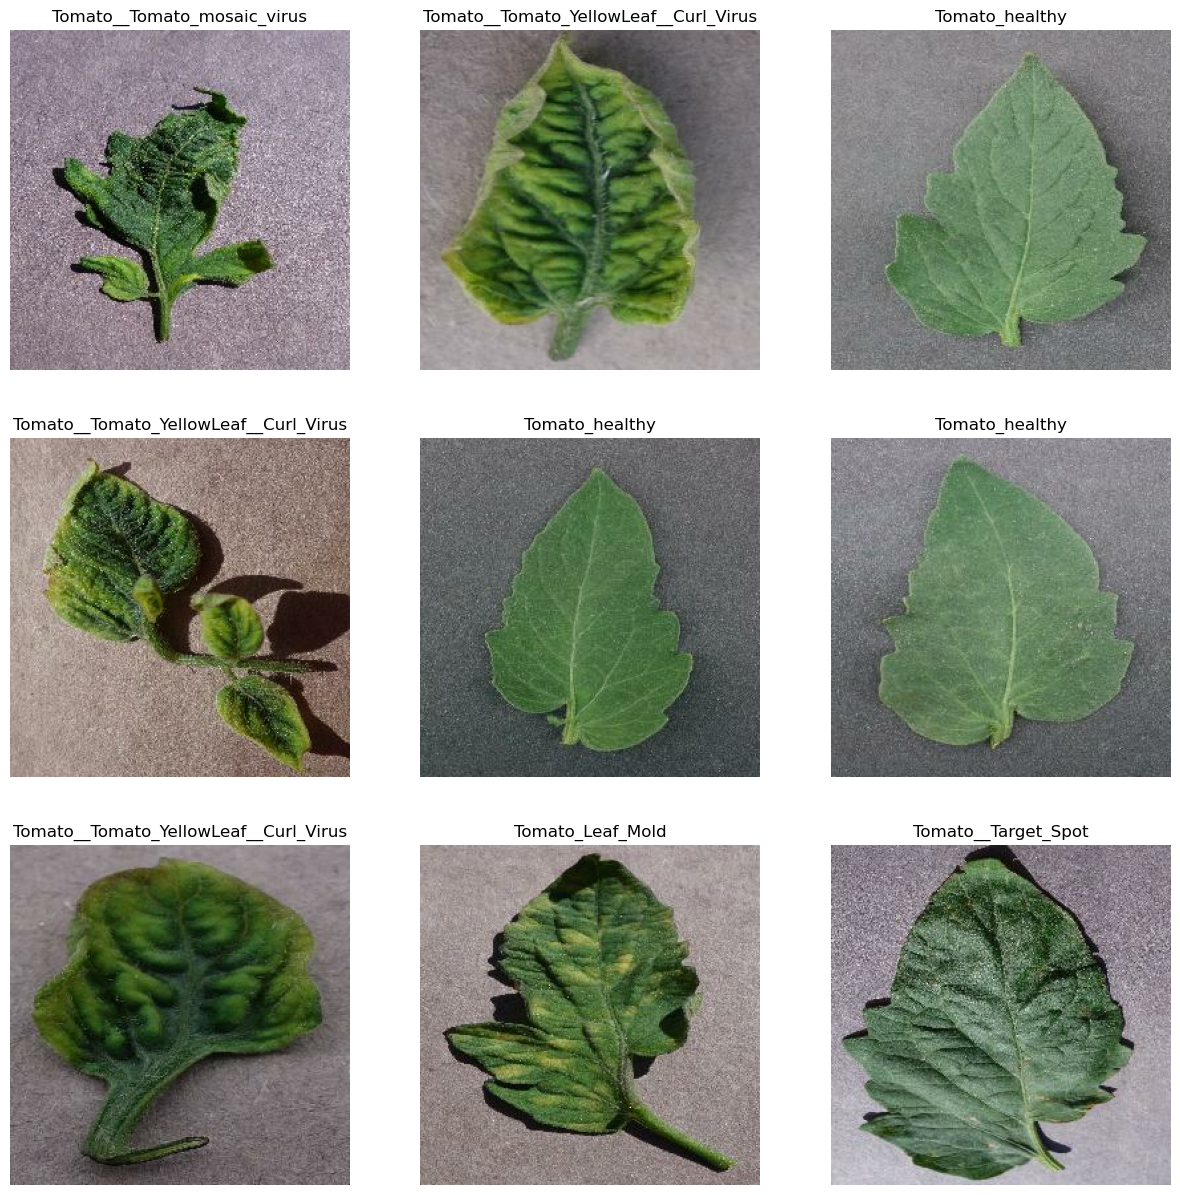

In [6]:
plt.figure(figsize=(15,15))
for img_batch,label_batch in tf_data.take(1):
    for i in range(9):
       
        plt.subplot(3,3,i+1)
        plt.imshow(img_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(cls_name[label_batch[i]])

In [7]:
data_size = len(tf_data)
train_size=round(data_size*0.8)
test_size=data_size-train_size
valid_size=test_size//2
test_size=valid_size

## Train 80%
## Test 20%
#### ->Validation 10%
#### ->Test 10%

In [8]:
train_size,test_size,valid_size

(401, 50, 50)

In [9]:
train_ds=tf_data.take(train_size)

In [10]:
test_ds = tf_data.skip(train_size)

In [11]:
valid_ds = test_ds.take(valid_size)

In [12]:
test_ds=test_ds.skip(valid_size)

In [13]:
def get_data_partition(tf_data,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=300):
    data_size=len(tf_data)
    train_size=round(data_size*train_split)
    val_size=round(data_size*val_split)
    if shuffle:
        tf_data=tf_data.shuffle(shuffle_size,seed=12)
    train_ds=tf_data.take(train_size)
    valid_ds=tf_data.skip(train_size).take(val_size)
    test_ds=tf_data.skip( train_size).skip(val_size)
    return train_ds,valid_ds,test_ds

In [14]:
train_ds,valid_ds,test_ds=get_data_partition(tf_data)
len(train_ds),len(valid_ds),len(test_ds)

(401, 50, 50)

In [15]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds=valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size,img_size),
    layers.experimental.preprocessing.Rescaling(1.0/img_size),
])

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [18]:
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=ip_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_cls, activation='softmax'),
])
model.build(input_shape=ip_shape)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])


In [21]:
history= model.fit(train_ds,
         epochs=EPOCHS,
         batch_size=bth_size,
         verbose=1,
         validation_data=valid_ds)

Epoch 1/50




InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\dhurk\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\dhurk\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\dhurk\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\dhurk\AppData\Local\Temp\ipykernel_22348\1771856621.py", line 1, in <module>

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\dhurk\anaconda3\Lib\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 3).  Label values: 0 4 6 4 3 2 2 7 2 9 7 2 3 5 5 5 6 9 7 5 7 2 1 0 1 2 0 7 5 5 9 9
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_2433]

In [ ]:
score = model.evaluate(test_ds)

In [23]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Loss Measurement')

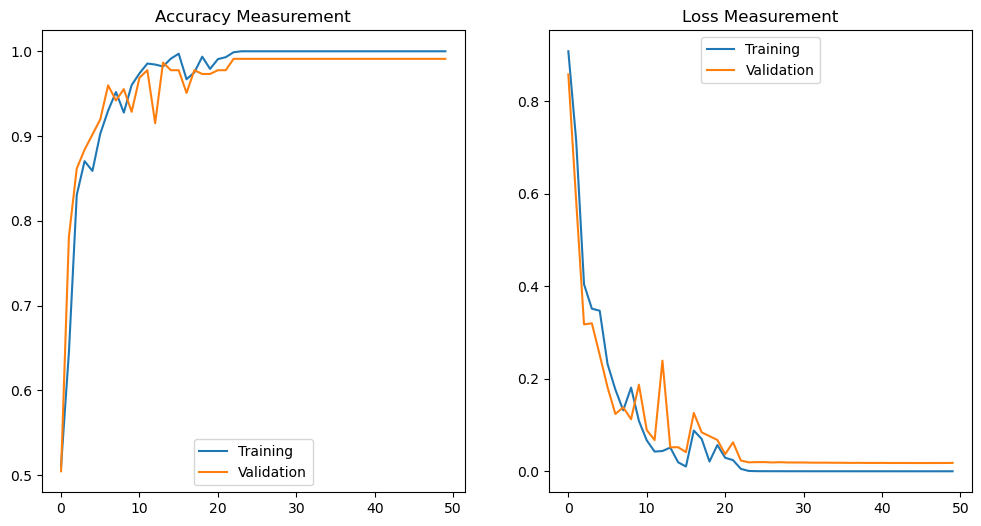

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),history.history['accuracy'],label='Training')
plt.plot(range(EPOCHS),history.history['val_accuracy'],label='Validation')
plt.legend(loc='lower center')
plt.title('Accuracy Measurement')
plt.legend(loc='lower center')
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),history.history['loss'],label='Training')
plt.plot(range(EPOCHS),history.history['val_loss'],label='Validation')
plt.legend(loc='upper center')
plt.title('Loss Measurement')

In [26]:
def predict_class(model,img):
    img = tf.keras.preprocessing.image.array_to_img(img.numpy())
    img = tf.expand_dims(img,0)
    predict = model.predict(img)
    predict_name = cls_name[np.argmax(predict[0])]
    confidence = round(np.max(predict[0]),2)
    return predict_name,confidence

1/1 [==============================] - 0s 50ms/step


<Figure size 1500x2500 with 0 Axes>

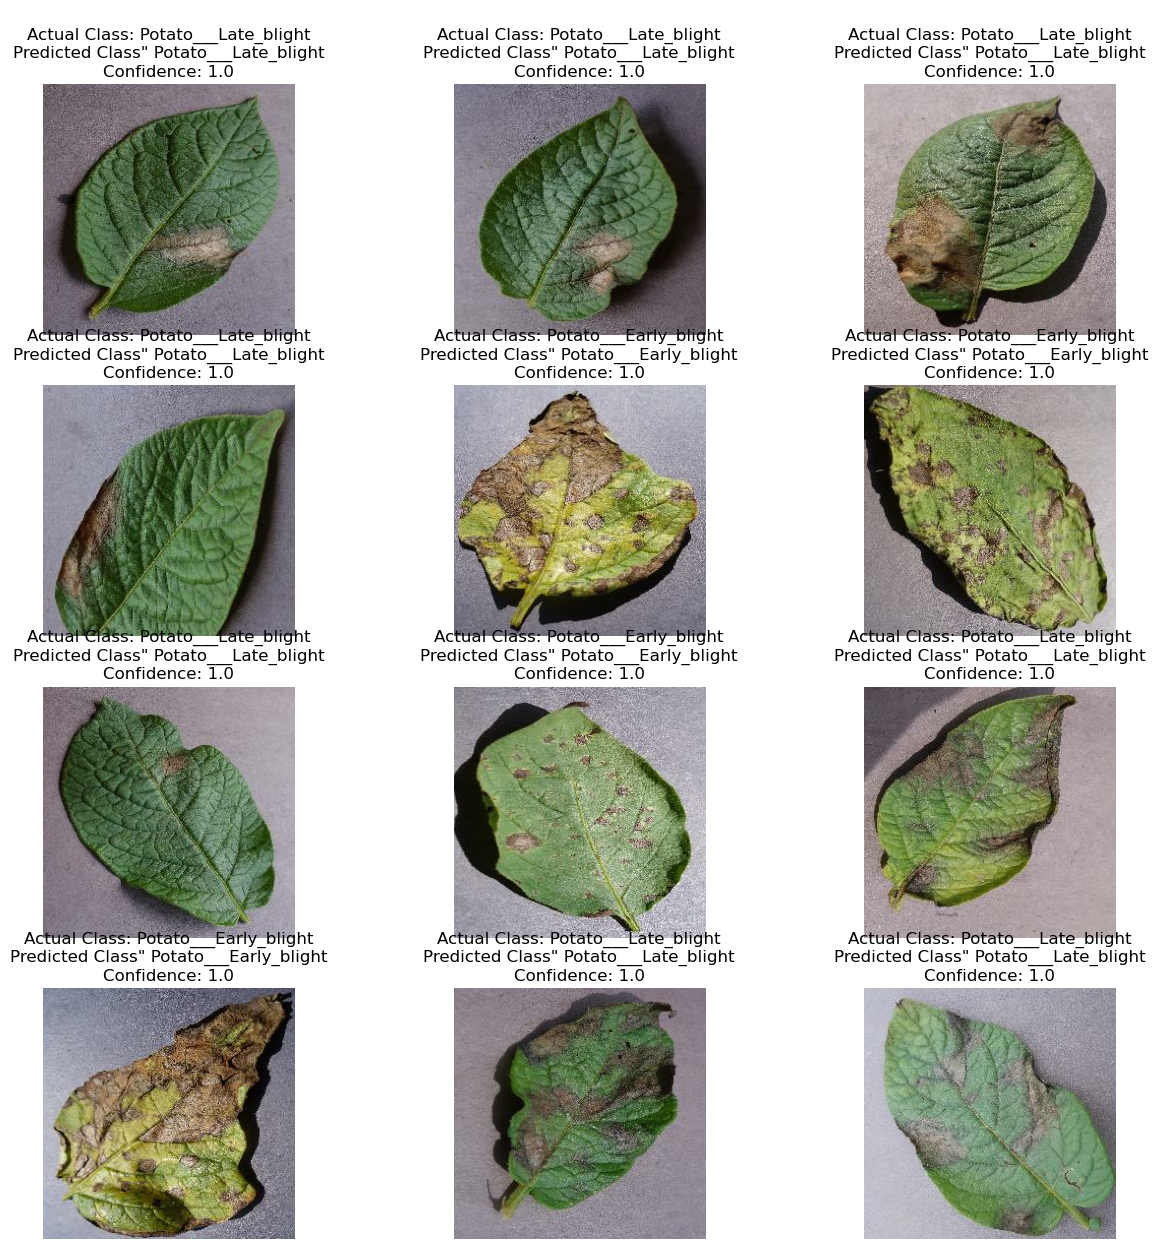

In [27]:
plt.figure(figsize=(15,25))
for img,label in test_ds.take(1):
    plt.figure(figsize=(15,15))
    for i in range(12):
        plt.subplot(4,3,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.axis('off')
        predict_name,confidence = predict_class(model,img[i])
        plt.title(f'\nActual Class: {cls_name[label[i].numpy()]}\nPredicted Class" {predict_name}\nConfidence: {confidence}')
       
    

In [31]:
ti=max([int(x) for x in os.listdir('..\saved_models')])
model_name=str(ti+1)
model_name

'2'

In [32]:
model.save(f'..\\Models\\{model_name}')

INFO:tensorflow:Assets written to: ..\Models\2\assets


INFO:tensorflow:Assets written to: ..\Models\2\assets
